In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

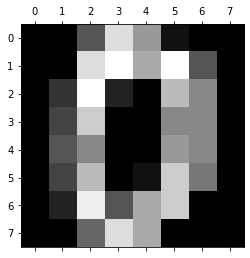

In [5]:
plt.gray()
plt.matshow(digits.images[0])

In [9]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [28]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(digits.data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.score(X_test, y_test)

0.9694444444444444

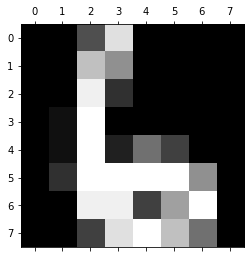

In [32]:
plt.matshow(digits.images[67])

In [33]:
digits.target[67]

6

In [38]:
scaled = scaler.transform([digits.data[67]])[0]

model.predict([scaled])

array([6])

In [41]:
scaled = scaler.transform(digits.data[0:5])
print(digits.target[0:5])

print(model.predict(scaled))

[0 1 2 3 4]
[0 1 2 3 4]


In [42]:
from sklearn.metrics import confusion_matrix

In [47]:
y_predicted = model.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_predicted)

In [49]:
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  1,  0,  1,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]])

Note: you may need to restart the kernel to use updated packages.


Text(69.0, 0.5, 'Truth')

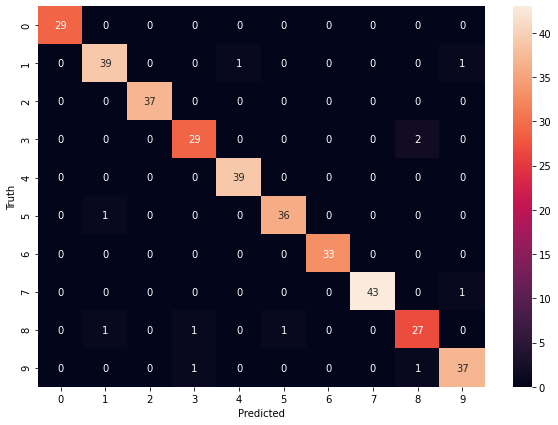

In [52]:
%pip install seaborn -q
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')